In [1]:
import pandas as pd

In [2]:
df = pd.read_json('/content/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
customer_df = df['customer'].apply(pd.Series)
phone_df = df['phone'].apply(pd.Series)
internet_df = df['internet'].apply(pd.Series)
account_df = df['account'].apply(pd.Series)

df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']), customer_df, phone_df, internet_df, account_df], axis=1)

display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [4]:
charges_df = df['Charges'].apply(pd.Series)
charges_df.rename(columns={'Monthly': 'MonthlyCharges', 'Total': 'TotalCharges'}, inplace=True)
df = pd.concat([df, charges_df], axis=1)
df.drop(columns=['Charges'], inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].head()

,TotalCharges
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40


In [5]:
binary_columns = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in binary_columns:
    # Map 'Yes' to 1, and 'No'/'No phone service'/'No internet service' to 0
    # This handles both simple Yes/No and columns with a third 'no service' category
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert 'gender' column: 'Female' to 0, 'Male' to 1
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

display(df[['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines']].head())

,Churn,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines
0,0,0,1,1,1,1,0
1,0,1,0,0,1,0,1
2,1,1,0,0,1,1,0
3,1,1,1,0,1,1,0
4,1,0,1,0,1,1,0


In [6]:
df['Contas_Diarias'] = df['MonthlyCharges'] / 30
display(df[['MonthlyCharges', 'Contas_Diarias']].head())

,MonthlyCharges,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [7]:
missing_values_count = df.isnull().sum()
duplicate_rows_count = df.duplicated().sum()

print("Missing values per column:")
print(missing_values_count)
print("\nNumber of duplicate rows:")
print(duplicate_rows_count)

Missing values per column:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Contas_Diarias       0
dtype: int64

Number of duplicate rows:
0


## Estatísticas Descritivas para Colunas Numéricas




In [8]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contas_Diarias']
descriptive_stats = df[numeric_columns].describe()
display(descriptive_stats)

,tenure,MonthlyCharges,TotalCharges,Contas_Diarias
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [9]:
categorical_columns = [
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen'
]

print("Frequency distribution for categorical columns:")
for col in categorical_columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print(f"Proportion for {col}:")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

Frequency distribution for categorical columns:

--- Churn ---
Churn
0    5398
1    1869
Name: count, dtype: int64
Proportion for Churn:
Churn
0    74.28%
1    25.72%
Name: proportion, dtype: object

--- gender ---
gender
1    3675
0    3592
Name: count, dtype: int64
Proportion for gender:
gender
1    50.57%
0    49.43%
Name: proportion, dtype: object

--- Partner ---
Partner
0    3749
1    3518
Name: count, dtype: int64
Proportion for Partner:
Partner
0    51.59%
1    48.41%
Name: proportion, dtype: object

--- Dependents ---
Dependents
0    5086
1    2181
Name: count, dtype: int64
Proportion for Dependents:
Dependents
0    69.99%
1    30.01%
Name: proportion, dtype: object

--- PhoneService ---
PhoneService
1    6560
0     707
Name: count, dtype: int64
Proportion for PhoneService:
PhoneService
1    90.27%
0     9.73%
Name: proportion, dtype: object

--- MultipleLines ---
MultipleLines
0    4202
1    3065
Name: count, dtype: int64
Proportion for MultipleLines:
MultipleLines
0    57.82

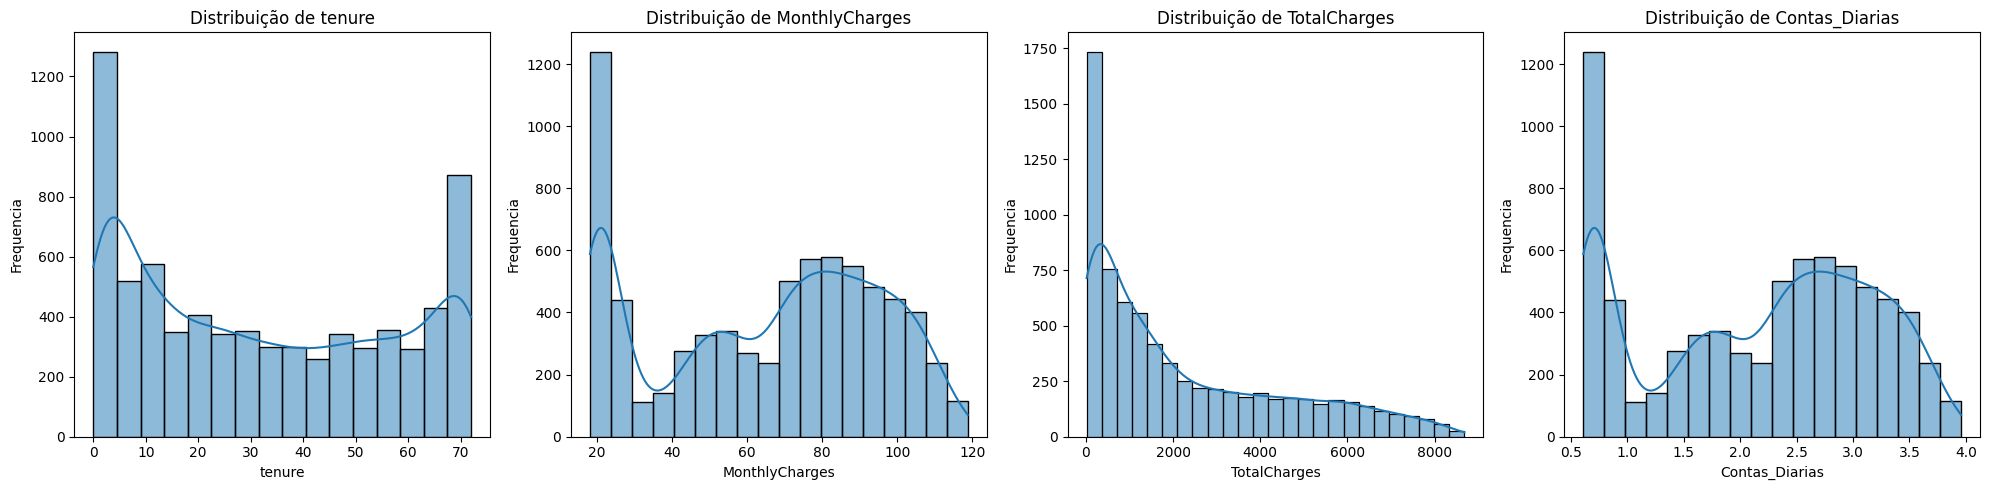

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contas_Diarias']

fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols_to_plot), figsize=(20, 5))

if len(numeric_cols_to_plot) == 1:
    axes = [axes]

for i, col in enumerate(numeric_cols_to_plot):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequencia', fontsize=10)

plt.tight_layout()
plt.show()


/tmp/ipython-input-4034735130.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-4034735130.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-4034735130.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-4034735130.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

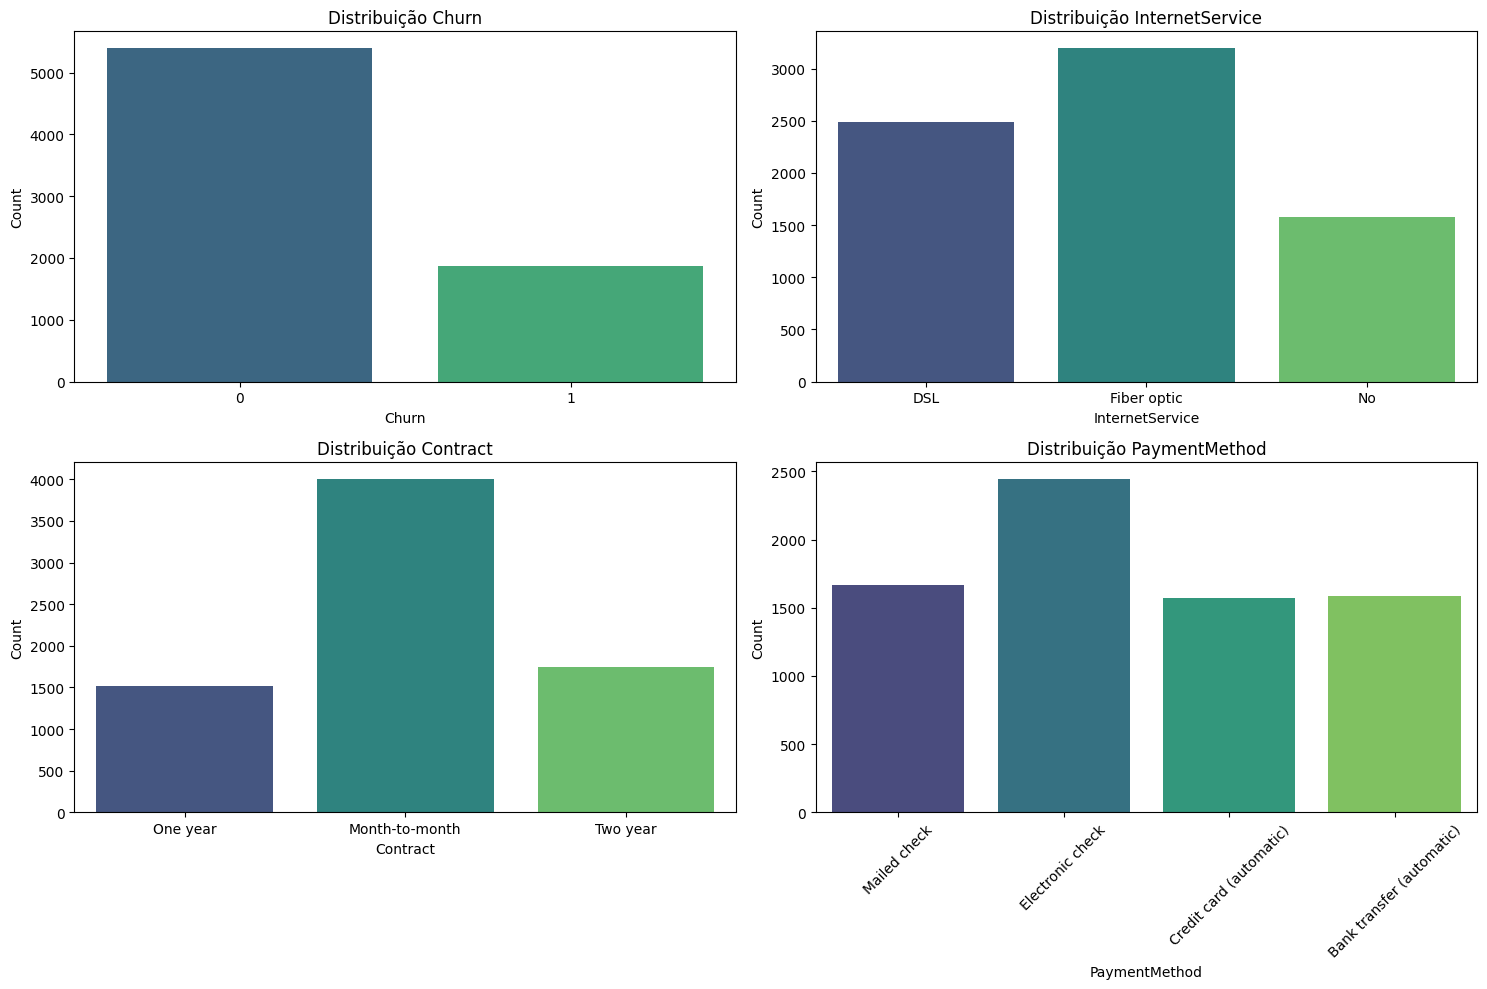

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols_to_plot = ['Churn', 'InternetService', 'Contract', 'PaymentMethod']

n_cols = 2
n_rows = (len(categorical_cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows == 1 or n_cols == 1:
    axes = axes.flatten()
else:
    axes = axes.flatten()

for i, col in enumerate(categorical_cols_to_plot):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribuição {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

    if col == 'PaymentMethod':
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


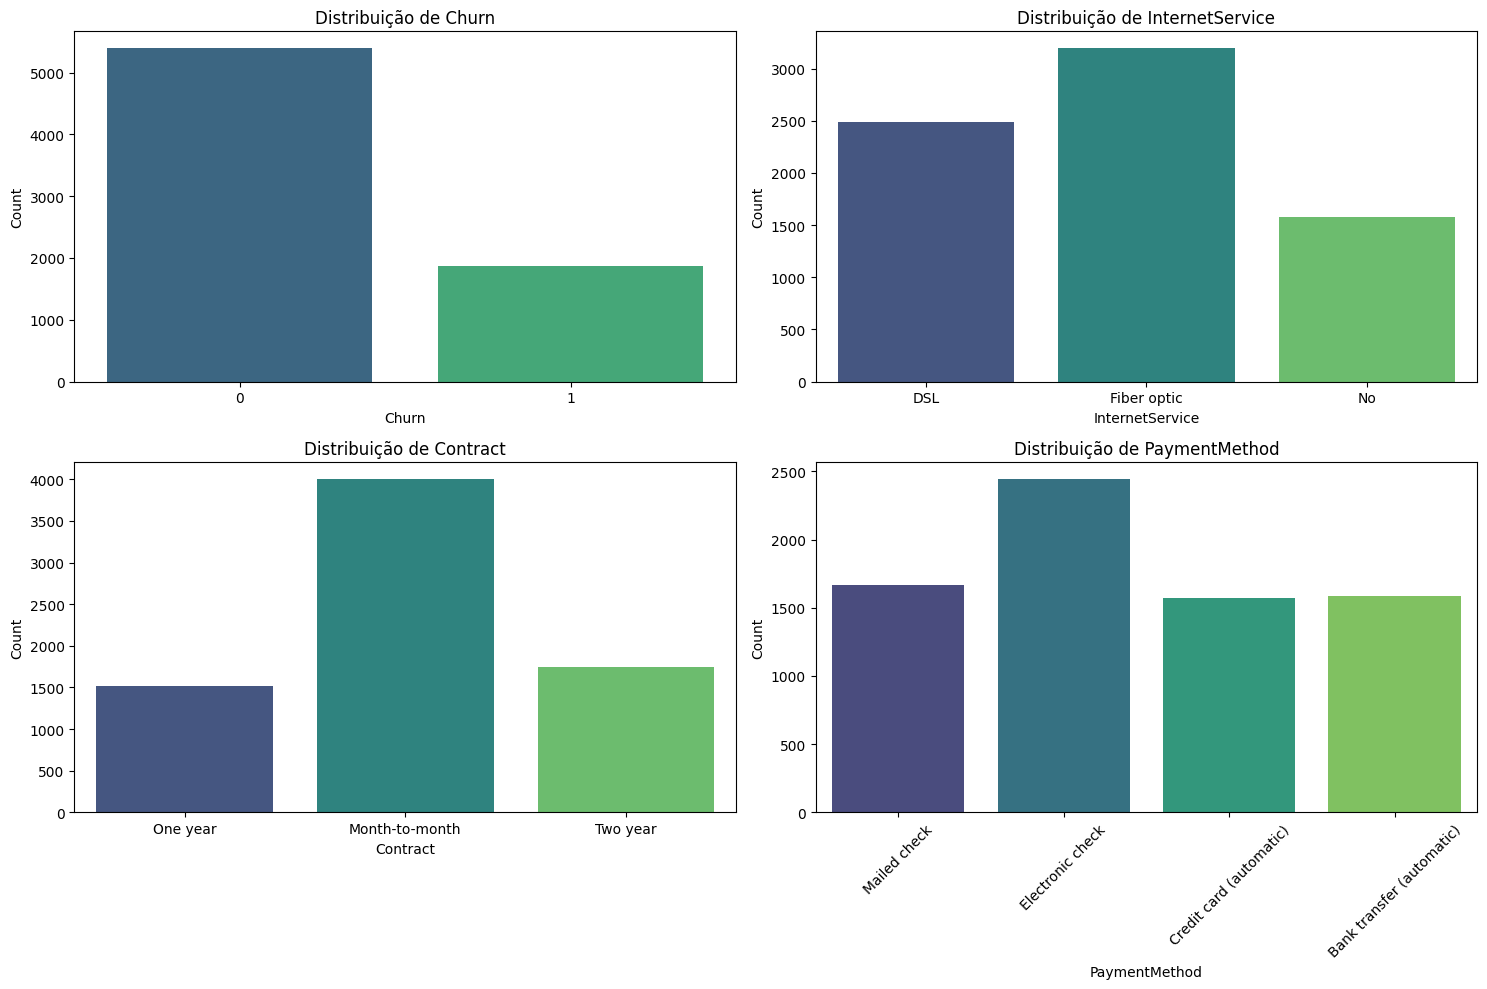

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols_to_plot = ['Churn', 'InternetService', 'Contract', 'PaymentMethod']

n_cols = 2
n_rows = (len(categorical_cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows == 1 or n_cols == 1:
    axes = axes.flatten()
else:
    axes = axes.flatten()

for i, col in enumerate(categorical_cols_to_plot):
    sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='viridis', legend=False)
    axes[i].set_title(f'Distribuição de {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    # Rotate x-axis labels if they are long
    if col == 'PaymentMethod':
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [13]:
categorias_colunas_churn = ['gender', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod', 'SeniorCitizen', 'PaperlessBilling']
print("Lista de categorias para cancelamento de clientes.")

Lista de categorias para cancelamento de clientes.


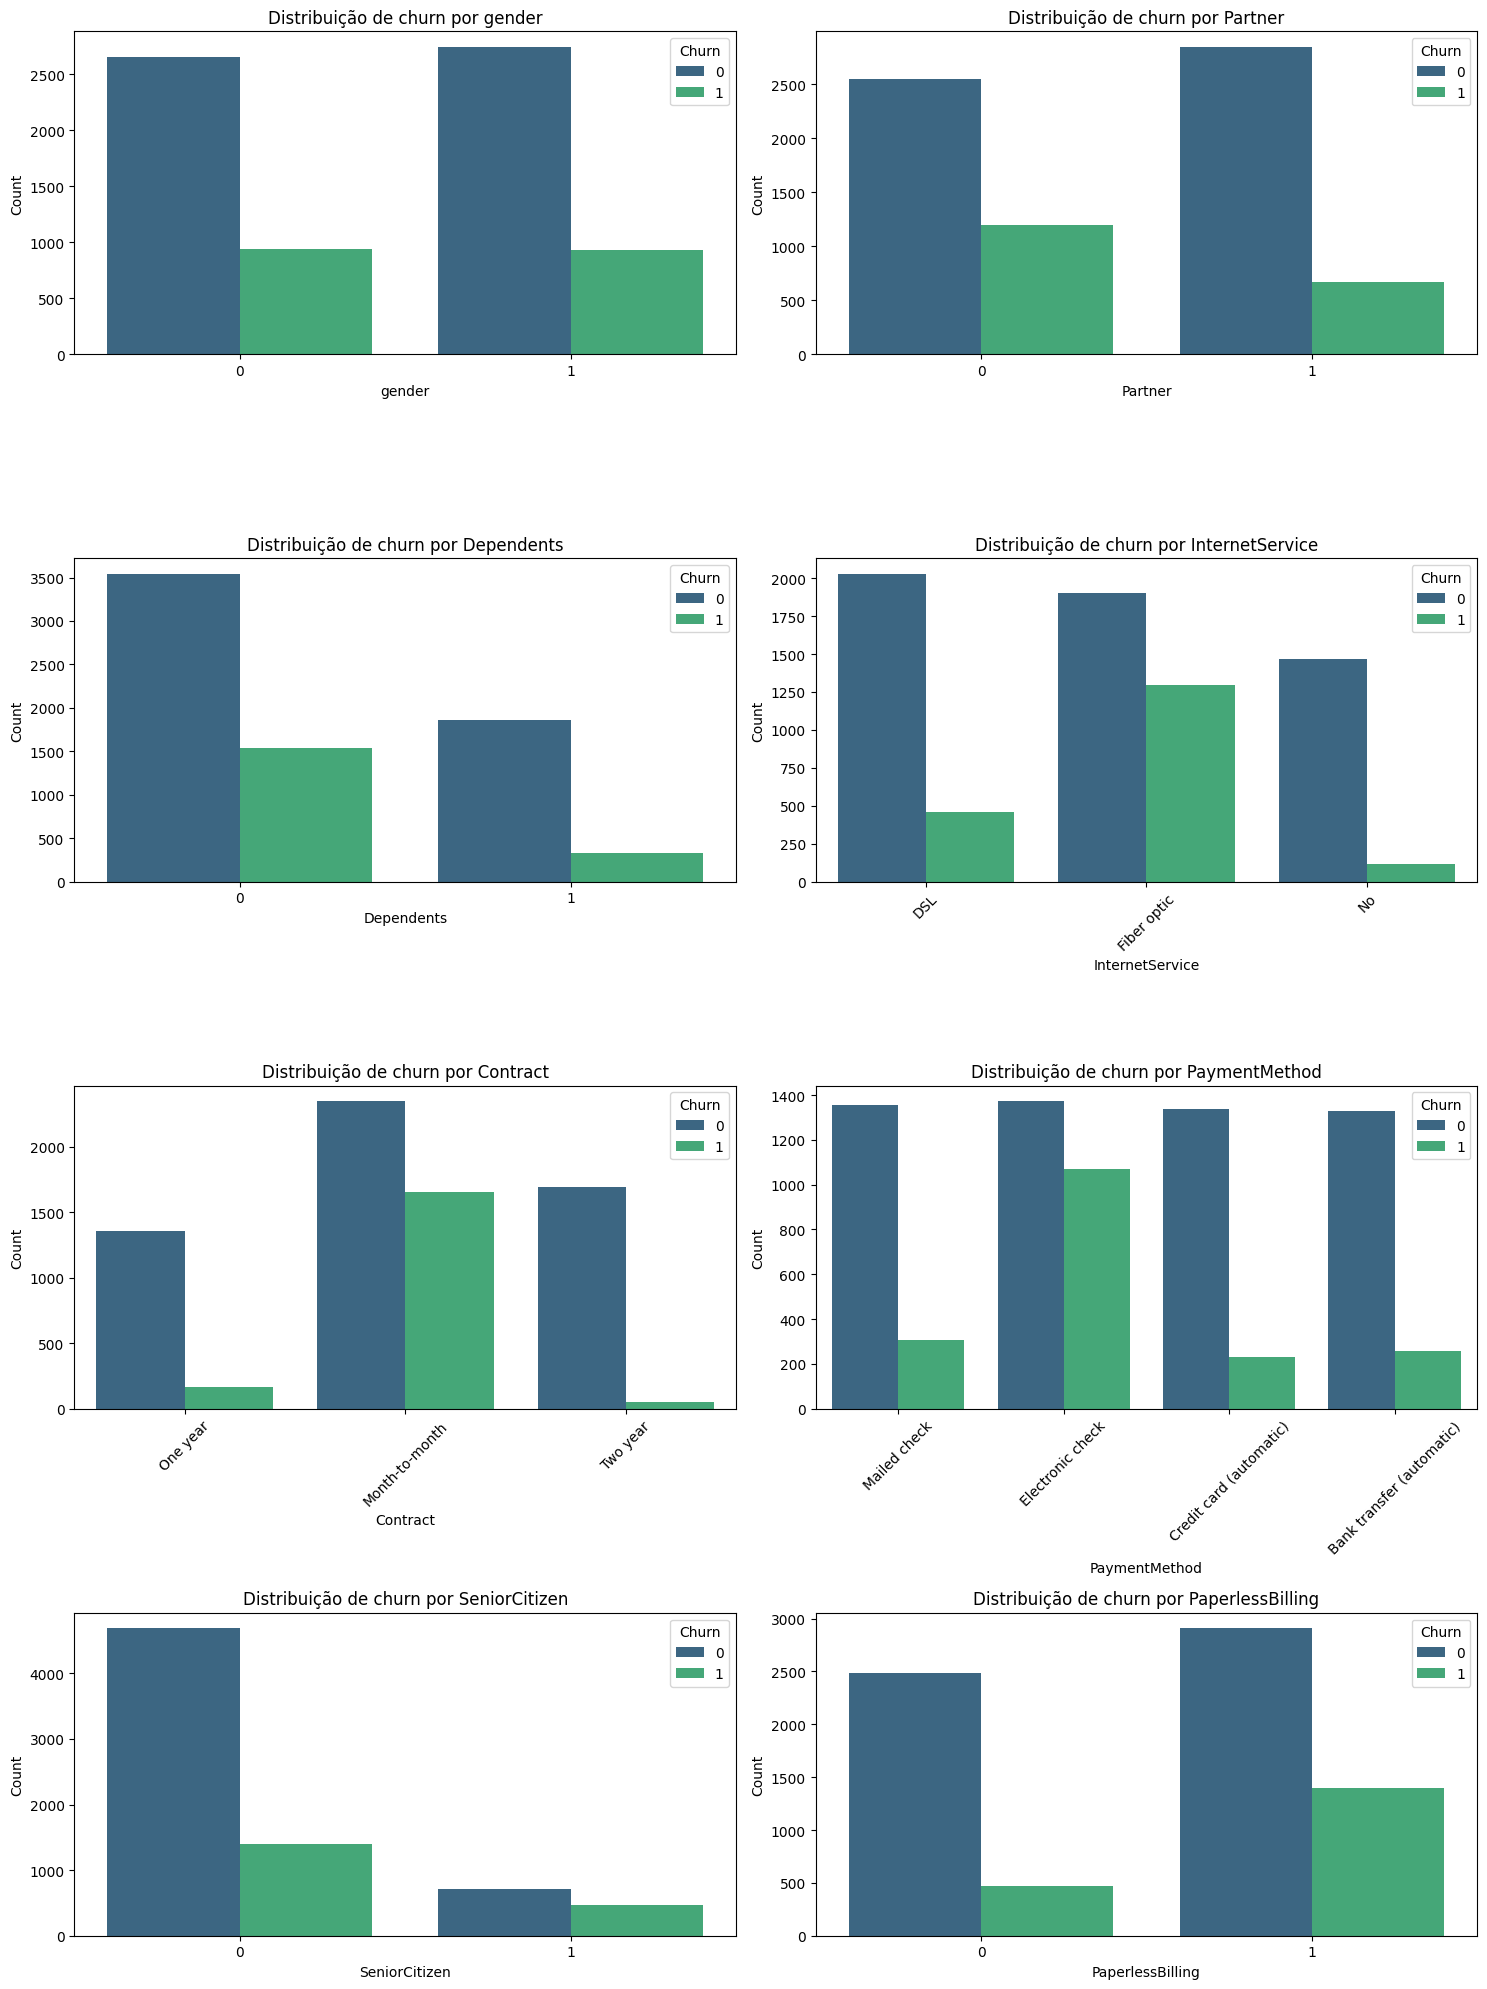

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 2
n_rows = (len(categorias_colunas_churn) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows == 1 or n_cols == 1:
    axes = axes.flatten()
else:
    axes = axes.flatten()


for i, col in enumerate(categorias_colunas_churn):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribuição de churn por {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)

    # Rotate x-axis labels if they are long
    if col == 'PaymentMethod' or col == 'InternetService' or col == 'Contract':
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [15]:
analise_numerica_churn = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contas_Diarias']
print("Lista de colunas numéricas para churn.")

Lista de colunas numéricas para churn.


/tmp/ipython-input-3419566992.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-3419566992.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-3419566992.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-3419566992.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

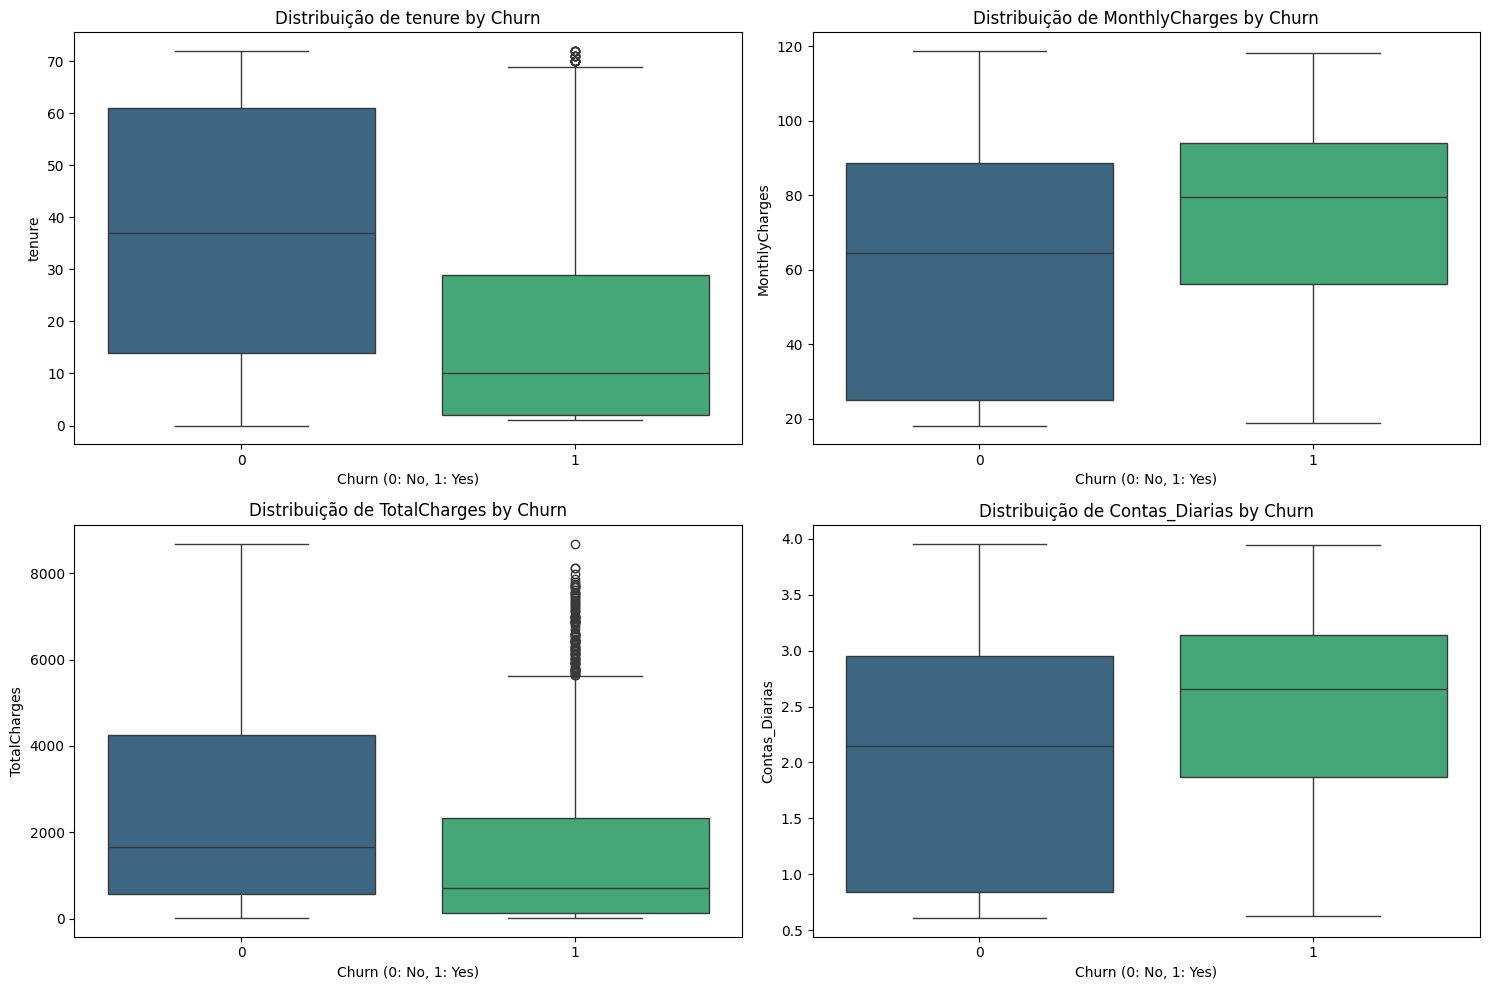

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 2
n_rows = (len(analise_numerica_churn) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows == 1 or n_cols == 1:
    axes = axes.flatten()
else:
    axes = axes.flatten()

# Iterate through each column and create a box plot
for i, col in enumerate(analise_numerica_churn):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribuição de {col} by Churn', fontsize=12)
    axes[i].set_xlabel('Churn (0: No, 1: Yes)', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

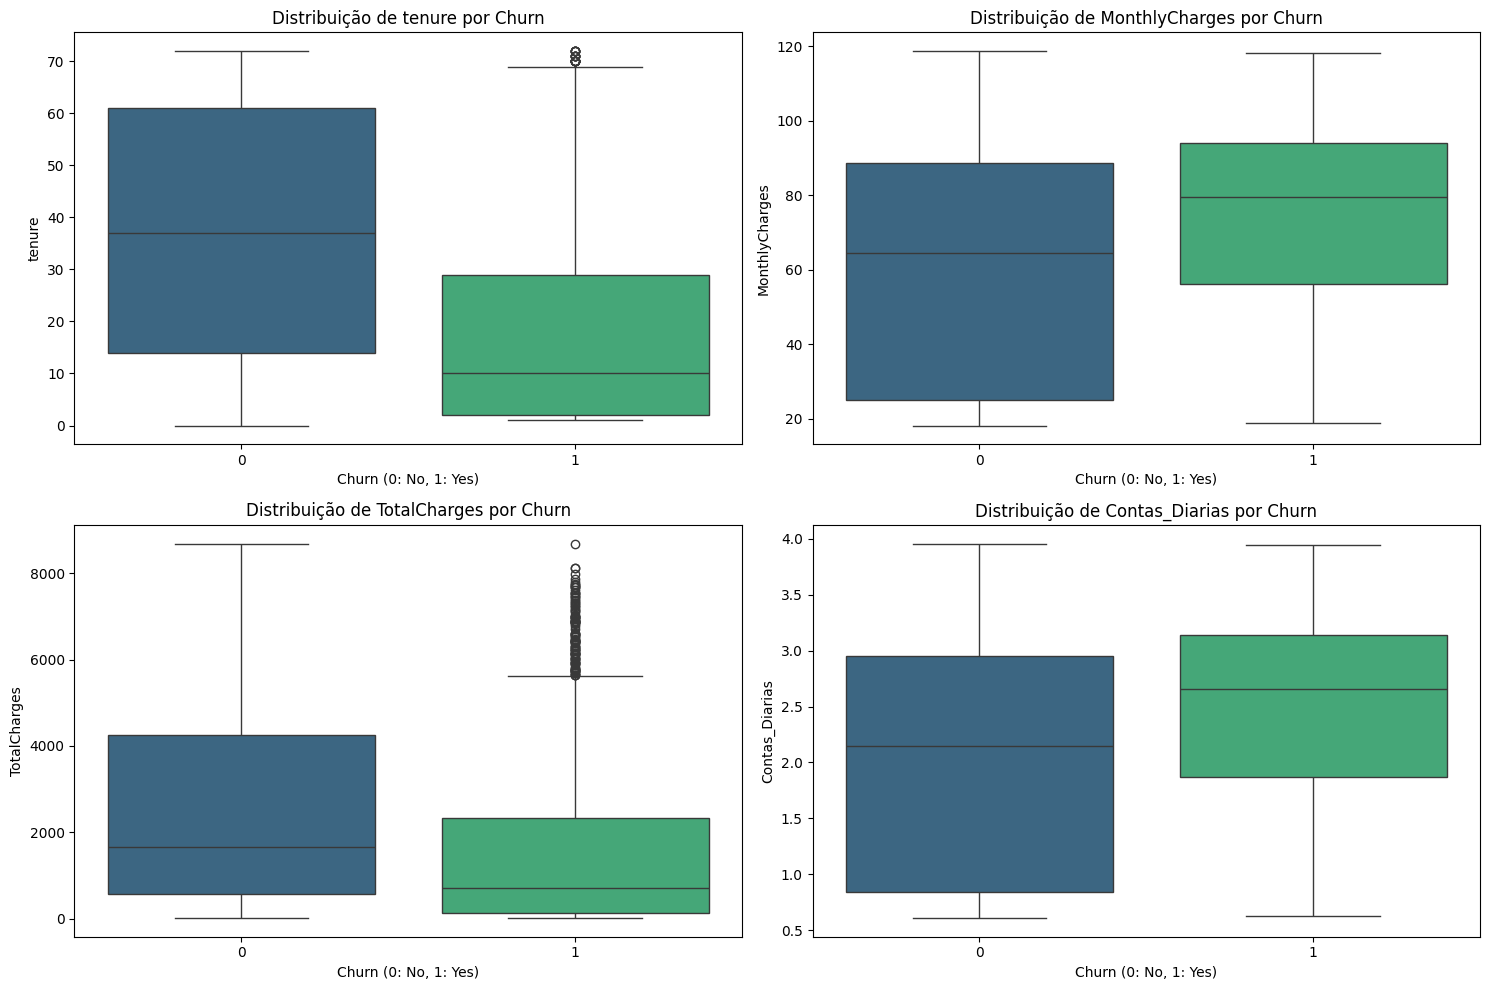

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 2
n_rows = (len(analise_numerica_churn) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows == 1 or n_cols == 1:
    axes = axes.flatten()
else:
    axes = axes.flatten()

for i, col in enumerate(analise_numerica_churn):
    sns.boxplot(data=df, x='Churn', y=col, hue='Churn', ax=axes[i], palette='viridis', legend=False)
    axes[i].set_title(f'Distribuição de {col} por Churn', fontsize=12)
    axes[i].set_xlabel('Churn (0: No, 1: Yes)', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()



Este relatório tem como objetivo realizar uma análise exploratória de dados para entender os fatores que contribuem para a evasão de clientes (churn) em a empresa de telecomunicações, a Telecom X. A evasão de clientes, ou churn, representa um desafio significativo para as empresas de telecomunicações, pois a perda de clientes resulta diretamente em diminuição da receita e aumento dos custos de aquisição de novos clientes. Através desta análise, buscaremos identificar padrões e características dos clientes que evadem, a fim de fornecer insights para estratégias de retenção mais eficazes.



### Limpeza e Tratamento de dados:


1. As colunas aninhadas 'customer', 'phone', 'internet' e 'account' foram desmembradas. Seus conteúdos foram expandidos em novas colunas de nível superior, facilitando o acesso direto aos dados individuais.

2. A coluna 'Charges', que continha informações sobre cobranças, foi processada para extrair 'MonthlyCharges' e 'TotalCharges'. A coluna 'TotalCharges' foi convertida para o tipo numérico, com quaisquer valores não numéricos sendo tratados como ausentes (NaN) para garantir a integridade dos cálculos.

3. Várias colunas categóricas, como 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' e 'StreamingMovies', foram convertidas para um formato binário (0 ou 1) para padronizar as entradas e facilitar a análise e modelagem.

4. Uma nova coluna, 'Contas_Diarias', foi criada a partir de 'MonthlyCharges' dividindo o valor mensal por 30, fornecendo uma métrica diária de cobrança.

Análise Exploratória de Dados (Numérica)


Com base nas estatísticas descritivas podemos observar o seguinte:

•	Tempo de permanência do cliente: A média de permanência dos clientes é de aproximadamente 32 meses, com uma variação significativa (desvio padrão de 24.57 meses), indicando uma distribuição ampla entre clientes novos e de longa data. A mediana é de 29 meses.

•	Cobranças mensais: As cobranças mensais variam de 18.25a118.75, com uma média de aproximadamente 64.72. Os valores pagos pelos clientes estão entre 35.42 e 70. 30

•	Cobranças totais: As cobranças totais têm uma média de aproximadamente 2280.63, mas com um desvio padrão muito alto de 2268.63, indicando uma grande variabilidade

•	Contas Diárias: Esta coluna apresenta média de aproximadamente 2.16 e desvio padrão de 51.00.


### Análise dos Gráficos de Distribuição em Relação ao Churn

Ao análisar os box plots que comparam as distribuições das variáveis numéricas entre clientes que evadiram (Churn=1) e não evadiram (Churn=0) podemos concluir que:

*  Clientes que cancelam (Churn=1) tendem a ter um tempo de permanência significativamente menor. O box plot para Churn=1 mostra uma mediana e um intervalo interquartil muito mais baixos em comparação com Churn=0, sugerindo que clientes de curta duração são mais propensos a cancelar o serviço.
*  Clientes que cancelam (Churn=1) geralmente têm cobranças mensais (MonthlyCharges) mais altas. O box plot para Churn=1 apresenta uma mediana de cobranças mensais visivelmente maior do que para Churn=0, indicando que planos mais caros podem estar associados a uma maior taxa de churn.
*  Clientes que cancelam (Churn=1) tendem a ter cobranças totais (TotalCharges) mais baixas. O box plot para Churn=1 exibe uma mediana e uma dispersão significativamente menores para TotalCharges.
*  Clientes com Churn=1 também apresentam Contas_Diarias mais altas, confirmando a correlação entre cobranças mais elevadas e a propensão ao churn.

Em resumo, clientes que cancelam (Churn=1) são frequentemente novos clientes com alta cobrança mensal, resultando em baixas cobranças totais.

## Resumo da Análise Exploratória de Dados (Categórica)

### Principais Achados das Distribuições de Frequência para Colunas Categóricas

*   **Churn**: Aproximadamente 25.72% dos clientes no dataset abandonaram o serviço (churn), enquanto 74.28% permaneceram.
*   **Gênero**: A distribuição de gênero é bastante equilibrada, com 50.57% de clientes do sexo masculino e 49.43% do sexo feminino.
*   **Parceiros e Dependentes**: Cerca de 51.59% dos clientes não têm parceiros e 69.99% não têm dependentes, indicando que uma grande parcela da base de clientes é composta por indivíduos sem laços familiares diretos que usem o serviço.
*   **Serviço de Telefone**: A maioria dos clientes (90.27%) possui serviço de telefone.
*   **Múltiplas Linhas**: 57.82% dos clientes não possuem múltiplas linhas, enquanto 42.18% sim.
*   **Serviço de Internet**: O serviço de internet mais comum é a Fibra Óptica (44.01%), seguido por DSL (34.24%). Cerca de 21.76% dos clientes não têm serviço de internet.
*   **Serviços Adicionais (Online Security, Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies)**: Uma proporção significativa de clientes não assina serviços adicionais de segurança, backup, proteção de dispositivo ou suporte técnico (todos na faixa de 65-71% de 'Não'). Para Streaming TV e Streaming Movies, a distribuição é mais próxima de 60% 'Não' e 40% 'Sim'.
*   **Tipo de Contrato**: Mais da metade dos clientes (55.11%) possui contratos mensais (Month-to-month), o que geralmente implica em maior flexibilidade e menor fidelidade.
*   **Faturamento Sem Papel (Paperless Billing)**: 59.32% dos clientes optam por faturamento sem papel.
*   **Método de Pagamento**: O método de pagamento mais frequente é o cheque eletrônico (33.65%), seguido por cheque enviado por correio (22.91%), transferência bancária automática (21.87%) e cartão de crédito automático (21.58%).
*   **Idosos (Senior Citizen)**: A maioria dos clientes (83.73%) não é idosa (SeniorCitizen = 0).

### Análise dos Gráficos de Barras em Relação ao Churn

Ao analisar a distribuição de churn em relação às variáveis categóricas, observamos padrões distintos:

*   **Gênero**: O gênero não parece ter uma influência significativa na taxa de churn, pois as proporções de churn entre clientes do sexo masculino e feminino são muito semelhantes.
*   **Parceiros e Dependentes**: Clientes sem parceiros e sem dependentes mostram uma taxa de churn visivelmente maior em comparação com aqueles que possuem parceiros e/ou dependentes. Isso pode sugerir que clientes com laços familiares podem ter maior lealdade ao serviço.
*   **Serviço de Internet**: Clientes com serviço de internet de **Fibra Óptica** apresentam uma taxa de churn consideravelmente mais alta do que aqueles com DSL ou sem serviço de internet. Isso pode indicar problemas de qualidade ou satisfação com o serviço de fibra óptica.
*   **Tipo de Contrato**: O tipo de contrato é um forte preditor de churn. Clientes com contratos **Month-to-month** têm uma taxa de churn dramaticamente mais elevada em comparação com aqueles com contratos de um ou dois anos. Contratos de longo prazo parecem reter clientes de forma mais eficaz.
*   **Método de Pagamento**: Clientes que utilizam **cheque eletrônico** como método de pagamento apresentam uma taxa de churn significativamente mais alta. Isso pode estar associado a uma menor conveniência ou a um perfil de cliente menos engajado a longo prazo.
*   **Idosos (Senior Citizen)**: Clientes idosos (SeniorCitizen = 1) mostram uma taxa de churn ligeiramente maior do que os não-idosos, embora a diferença não seja tão acentuada quanto em outras variáveis.
*   **Faturamento Sem Papel (Paperless Billing)**: Clientes que optam por faturamento sem papel (PaperlessBilling = 1) tendem a ter uma taxa de churn mais alta do que aqueles que recebem faturas em papel. Pode ser que a conveniência do faturamento sem papel não se traduza em maior lealdade para este grupo.

Em resumo, as variáveis mais impactantes na probabilidade de churn parecem ser o **tipo de contrato (especialmente Month-to-month), o serviço de internet (Fibra Óptica) e o método de pagamento (cheque eletrônico)**, além da ausência de parceiros e dependentes.

## Conclusões e Insights

A análise descritiva dos dados revela padrões significativos que podem ajudar a entender a evasão de clientes (Churn). Observamos que aproximadamente 25.72% dos clientes na base de dados churnaram. Clientes com menor tempo de serviço (tenure) e que possuem contratos Month-to-month apresentam uma propensão muito maior ao churn. Além disso, clientes com MonthlyCharges mais elevadas e que utilizam o serviço de internet Fiber optic ou o método de pagamento Electronic check também mostram taxas de churn mais altas. Por outro lado, clientes com serviços adicionais como OnlineSecurity e TechSupport, e aqueles com contratos de Two year ou One year, tendem a ser mais leais.

Para reduzir a evasão, a sugestão é focar em estratégias de retenção para clientes novos ou com pouco tempo de serviço, que estão em contratos mensais e com altos gastos mensais. Oferecer incentivos para a transição de contratos mensais para anuais ou bienais, e promover a adesão a serviços de segurança e suporte técnico, pode ser eficaz. Campanhas direcionadas a clientes com Fiber optic e Electronic check também são importantes, talvez investigando problemas específicos associados a esses grupos. A baixa taxa de churn em clientes sem serviço de internet (No InternetService) ou com Mailed check como método de pagamento pode indicar estabilidade nessas categorias, mas também pode ser um grupo a ser explorado para oportunidades de upsell, sem comprometer a lealdade.


Com base na análise descritiva e na visualização da distribuição de churn, as seguintes recomendações estratégicas podem ser consideradas para mitigar a taxa de rotatividade de clientes:

Clientes com menor tempo de permanência têm maior propensão ao churn. Sendo assim, os primeiros meses de contrato são cruciais para a permanência dos clientes. Deve-se buscar estratégias a fim de fidelizar essa clentela, como por exemplo descontos especias durantes alguns meses iniciais
Também podemos observar que clientes com contratos Month-to-month apresentam uma taxa de churn significativamente mais alta do que aqueles com contratos de One year ou Two year. Para a redução desse churn a empresa poderia criar descontos para contratos longos

 Verificar as causas subjacentes ao churn entre usuários de fibra óptica. Isso pode incluir problemas de instabilidade de conexão, suporte técnico inadequado, ou expectativas não atendidas.

Analisar o processo de pagamento via cheque eletrônico para identificar possíveis pontos de insatisfação. Pode ser necessário simplificar o processo, oferecer mais opções de suporte para esse método, ou incentivar a migração para métodos de pagamento mais estáveis e com menor churn, como Bank transfer (automatic) e Credit card (automatic) através de pequenos bônus ou descontos.

Desenvolver campanhas de marketing e ofertas de serviço que atendam às necessidades de clientes individuais, talvez com foco em flexibilidade ou em serviços que promovam a autonomia e a conveniência.

Ao focar nessas áreas específicas, a empresa pode desenvolver estratégias mais direcionadas e eficazes para reduzir o churn e aumentar a satisfação e retenção de clientes.